In [1]:
from matplotlib.ticker import FormatStrFormatter

In [54]:
from sklearn.metrics import roc_auc_score

In [65]:
def myROC(result_df, target, color,label=None,asc=False):
    condition_positive = result_df.iT.sum()
    condition_negative = (~result_df.iT.astype(bool)).astype(int).sum()

    doof = result_df.sort_values(by = [target], ascending=asc ).copy()
    doof['TPr'] = doof.iT.cumsum() / condition_positive
    doof['FPr'] = (~doof.iT.astype(bool)).astype(int).cumsum() / condition_negative
    roc_fool = doof[['iT',target]].dropna()
    rocscore = roc_auc_score(y_true = roc_fool.iT.values , 
                                y_score = roc_fool[target].values)
        
    if not label:
        label=target+" {}".format(rocscore)
    else:
        print(label, rocscore)
    ax.scatter(x = doof.FPr.values, 
                y = doof.TPr.values, 
                s=0.01, 
                label=label,
               c=color
              )

In [60]:
colors = sns.color_palette("colorblind", 8)

In [2]:
modelfps = [
"NIMRODREPODIR/results2019/test_sweep_M1957_hgGOOD_bsm_5_dexe_100_long/",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_gm12878_dexe1000_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe1000_bsm10",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe1000_bsm20",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe1000_bsm40",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe1000_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm10",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm20",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm40",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe25_bsm10",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe25_bsm20",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe25_bsm40",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe25_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe5_bsm10",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe5_bsm20",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe5_bsm40",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe5_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hl60_dexe1000_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_k562_dexe1000_bsm5",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_mm10_dexe1000_bsm15",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_mm10_dexe1000_bsm40",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_mm10_dexe25_bsm10",
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_mm10_dexe25_bsm20"]

In [3]:
modelnames = ["M1957_hgGOOD_bsm_5_dexe_100_long","M1957_gm12878_dexe1000_bsm5","M1957_hg19_dexe1000_bsm10","M1957_hg19_dexe1000_bsm20","M1957_hg19_dexe1000_bsm40","M1957_hg19_dexe1000_bsm5","M1957_hg19_dexe100_bsm10","M1957_hg19_dexe100_bsm20","M1957_hg19_dexe100_bsm40","M1957_hg19_dexe100_bsm5","M1957_hg19_dexe25_bsm10","M1957_hg19_dexe25_bsm20","M1957_hg19_dexe25_bsm40","M1957_hg19_dexe25_bsm5","M1957_hg19_dexe5_bsm10","M1957_hg19_dexe5_bsm20","M1957_hg19_dexe5_bsm40","M1957_hg19_dexe5_bsm5","M1957_hl60_dexe1000_bsm5","M1957_k562_dexe1000_bsm5","M1957_mm10_dexe1000_bsm15","M1957_mm10_dexe1000_bsm40",
"M1957_mm10_dexe25_bsm10",
"M1957_mm10_dexe25_bsm20"]

In [4]:
fpp = [["M1957","hg19","1000","5"],["M1957","gm12878","1000","5"],["M1957","hg19","1000","10"],["M1957","hg19","1000","20"],["M1957","hg19","1000","40"],["M1957","hg19","1000","5"],["M1957","hg19","100","10"],["M1957","hg19","100","20"],["M1957","hg19","100","40"],["M1957","hg19","100","5"],["M1957","hg19","25","10"],["M1957","hg19","25","20"],["M1957","hg19","25","40"],["M1957","hg19","25","5"],["M1957","hg19","5","10"],["M1957","hg19","5","20"],["M1957","hg19","5","40"],["M1957","hg19","5","5"],["M1957","hl60","1000","5"],["M1957","k562","1000","5"],
["M1957","mm10","1000","15"],
["M1957","mm10","1000","40"],
["M1957","mm10","25","10"],
["M1957","mm10","25","20"]]

In [5]:
modelsdf = pd.DataFrame(fpp)
modelsdf.columns = ['pwm','dataset','dexe','bsm']
modelsdf['name'] =modelnames
modelsdf['fp'] =modelfps

In [6]:
modelsdf['dexe'] = modelsdf['dexe'].astype(int)
modelsdf['bsm'] = modelsdf['bsm'].astype(int)

In [7]:
modelsdf.head()

pwm  dataset  dexe  bsm                              name  \
0  M1957     hg19  1000    5  M1957_hgGOOD_bsm_5_dexe_100_long   
1  M1957  gm12878  1000    5       M1957_gm12878_dexe1000_bsm5   
2  M1957     hg19  1000   10         M1957_hg19_dexe1000_bsm10   
3  M1957     hg19  1000   20         M1957_hg19_dexe1000_bsm20   
4  M1957     hg19  1000   40         M1957_hg19_dexe1000_bsm40   

                                                  fp  
0  NIMRODREPODIR/results2019/test_swe...  
1  NIMRODREPODIR/results2019/test_swe...  
2  NIMRODREPODIR/results2019/test_swe...  
3  NIMRODREPODIR/results2019/test_swe...  
4  NIMRODREPODIR/results2019/test_swe...

In [8]:
def fux(row):
    lot = []
    with open(row.fp+"/hg_tests.log",'r') as fi:
#     current_state=(None,None)
        for line in fi:
            if line.startswith("2019"):
                loss, auc = line.rstrip().split('\t')[5:7]
                rowc = row.copy()
                rowc['Tcase'] =case
                rowc['Tustep'] = ustep
                rowc['Tloss'] = loss
                rowc['Tauc'] = auc
                lot.append( rowc )
            else:
                name = line.rstrip()
                case,ustep = name.rstrip().split('-')
                ustep = int(ustep)
                case = case.split('_')[0]
    #             current_state=case,ustep
    return lot
def fuxmm(row):
    lot = []
    with open(row.fp+"/mm_tests.log",'r') as fi:
#     current_state=(None,None)
        for line in fi:
            if line.startswith("2019"):
                loss, auc = line.rstrip().split('\t')[5:7]
                rowc = row.copy()
                rowc['Tcase'] =case
                rowc['Tustep'] = ustep
                rowc['Tloss'] = loss
                rowc['Tauc'] = auc
                lot.append( rowc )
            else:
                name = line.rstrip()
                case,ustep = name.rstrip().split('-')
                ustep = int(ustep)
                case = case.split('_')[0]
    #             current_state=case,ustep
    return lot

In [9]:
# pd.DataFrame([x for y in modelsdf.head().apply(fux,axis=1) for x in y])

In [10]:
nicetable = pd.concat(pd.DataFrame(x) for x in modelsdf.apply(fux,axis=1))
nicetablemm = pd.concat(pd.DataFrame(x) for x in modelsdf.apply(fuxmm,axis=1))

In [68]:
# nicetable

In [62]:
def hackyload(fp):
    uff = pd.read_csv(fp, sep='\t')
    uff['nimrod'] = uff.logits_1 - uff.logits_0
    uff['iT'] = np.argmax(uff.loc[:,['labels_0','labels_1']].values, axis=1)
    return uff

In [79]:
for thing in (nicetable[(nicetable.Tcase=='auc') & (nicetable.dataset=='hg19')& (nicetable.dexe==100)]
    .sort_values(by="Tauc", ascending=False)
    .drop_duplicates(["name"])
    .sort_values(by='bsm',ascending=True)
    .fp):
    print(thing)

NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm5
NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm10
NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm20
NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm40


In [104]:
bsmsw1 = "NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe5_bsm5/hgstages_test_M1957_hg19_dexe5_bsm5_auc_at-1745000/test_results/test_after_TEST_batches.csv"
bsmsw2 = "NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe25_bsm5/hgstages_test_M1957_hg19_dexe25_bsm5_auc_at-935000/test_results/test_after_TEST_batches.csv"
bsmsw3 = "NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm5/hgstages_test_M1957_hg19_dexe100_bsm5_auc_at-865000/test_results/test_after_TEST_batches.csv"
bsmsw4 = "NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe1000_bsm5/hgstages_test_M1957_hg19_dexe1000_bsm5_auc_at-845000/test_results/test_after_TEST_batches.csv"

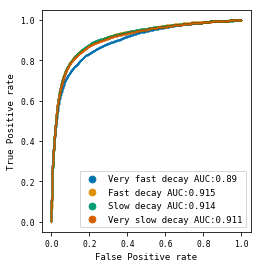

In [105]:
outname='tfigure_LRDecay'

Fwidth = THESIS_PAGEWIDTH*0.7
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.13, right=.99, top=.99)

# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(hackyload(bsmsw1,), 'nimrod',color = colors[0])
myROC(hackyload(bsmsw2,), 'nimrod',color = colors[1])
myROC(hackyload(bsmsw3,), 'nimrod',color = colors[2])
myROC(hackyload(bsmsw4,), 'nimrod',color = colors[3])

# plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# replace labels
new_labels = ['Very fast decay AUC:0.89',
             'Fast decay AUC:0.915',
             'Slow decay AUC:0.914',
             'Very slow decay AUC:0.911']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.png'.format(outname))

In [80]:
bsmsw1 ="NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm5/hgstages_test_M1957_hg19_dexe100_bsm5_auc_at-865000/test_results/test_after_TEST_batches.csv"
bsmsw2 ="NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm10/hgstages_test_M1957_hg19_dexe100_bsm10_auc_at-700000/test_results/test_after_TEST_batches.csv"
bsmsw3 ="NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm20/hgstages_test_M1957_hg19_dexe100_bsm20_auc_at-490000/test_results/test_after_TEST_batches.csv"
bsmsw4 ="NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm40/hgstages_test_M1957_hg19_dexe100_bsm40_auc_at-530000/test_results/test_after_TEST_batches.csv"

In [103]:
outname='tfigure_batchsize'

Fwidth = THESIS_PAGEWIDTH*0.7
Fheight = Fwidth
fig, ax = plt.subplots()
fig.subplots_adjust(left=.18, bottom=.13, right=.99, top=.99)

# ax.plot([0,1], color='black', linewidth=0.5, linestyle='-.')
myROC(hackyload(bsmsw1,), 'nimrod',color = colors[0])
myROC(hackyload(bsmsw2,), 'nimrod',color = colors[1])
myROC(hackyload(bsmsw3,), 'nimrod',color = colors[2])
myROC(hackyload(bsmsw4,), 'nimrod',color = colors[3])

plt.title('A ROC curve')
lgnd = plt.legend(loc='lower right')
lgnd.legendHandles[0]._sizes = [45]
lgnd.legendHandles[1]._sizes = [45]
lgnd.legendHandles[2]._sizes = [45]
lgnd.legendHandles[3]._sizes = [45]
# replace labels
new_labels = ['Very small batch AUC:0.91',
             'Small batch AUC:0.90',
             'Big batch AUC:0.89',
             'Very big batch AUC:0.88']
for t, l in zip(lgnd.texts, new_labels): 
    t.set_text(l)
ax.set_xlabel('False Positive rate')
ax.set_ylabel('True Positive rate')
fig.set_size_inches (Fwidth, Fheight)
fig.savefig('../Figures/from_notebooks/rocfigures/{}.png'.format(outname))

In [51]:
np.argmax(uff.loc[:,['logits_0','logits_1']].values, axis=1)

array([0, 0, 1, ..., 0, 0, 0])

In [53]:
np.argmax(uff.loc[:,['labels_0','labels_1']].values, axis=1)

array([0, 0, 1, ..., 0, 0, 0])

In [55]:
roc_auc_score(y_true = np.argmax(uff.loc[:,['labels_0','labels_1']].values, axis=1), 
              y_score = np.argmax(uff.loc[:,['logits_0','logits_1']].values, axis=1))

0.80591427560804552

In [12]:
# nicetablemm

In [24]:
 "NIMRODREPODIR/results2019/test_sweep_M1957_hgGOOD_bsm_5_dexe_100_long/hgstages_test_M1957_hgGOOD_bsm_5_dexe_100_long_auc_at-1260000/test_results/test_after_TEST_batches.csv"

peak_ui	logits_0	logits_1	labels_0	labels_1
0	4.3334703	-2.077008	1	0
1	3.7947497	-1.0815445	1	0
2	-7.4554987	9.613936	0	1
3	1.442901	0.2069554	0	1
4	3.355957	-0.7071254	1	0
5	5.821528	-2.5139453	1	0
6	5.430011	-2.433971	1	0
7	1.6670234	0.8318536	1	0
8	4.5708647	-1.6072493	1	0


In [37]:
"NIMRODREPODIR/results2019/test_sweeps/human_mouse/test_sweep_M1957_hg19_dexe100_bsm20/hgstages_test_M1957_hg19_dexe100_bsm20_auc_at-490000/test_results/test_after_TEST_batches.csv"

hgstages_test_M1957_hg19_dexe100_bsm20_auc_at-430000
hgstages_test_M1957_hg19_dexe100_bsm20_auc_at-490000
hgstages_test_M1957_hg19_dexe100_bsm20_loss_at-175000
hgstages_test_M1957_hg19_dexe100_bsm20_loss_at-190000
hg_tests.log
mmstages_test_M1957_hg19_dexe100_bsm20_auc_at-430000
mmstages_test_M1957_hg19_dexe100_bsm20_auc_at-490000
mmstages_test_M1957_hg19_dexe100_bsm20_loss_at-175000
mmstages_test_M1957_hg19_dexe100_bsm20_loss_at-190000
mm_tests.log


In [95]:

def plot_training_onax(row,ax,C, ytarg='auc',xtarg='ustep', xmultiplier=1):
    foofp = "NIMRODREPODIR/results2019/{}/training.log".format(row['name'])
    df = pd.read_csv(foofp, sep='\t')
    try:
        df = df[df.ustep!='TEST>>']
    except TypeError:
        pass

    x = df[xtarg].astype(int).values* xmultiplier
    y = df[ytarg].astype(float).values
    ax.plot(x,y, label=row['name'],color=C)
    
def plot_test_results_onax(row,ax,C):

    namemask = nicetable['name'] == row['name']
    aucmask = nicetable['Tcase'] == 'auc'
#     lossmask = nicetable['Tcase'] == 'loss'

    xs = [nicetable[namemask & aucmask].Tustep.astype(int).values[-1]]
    ys = [nicetable[namemask & aucmask].Tauc.astype(float).values[-1]]
    ax.scatter(y=ys,x=xs, marker="*", color=C,s=100)
    
#     xs = nicetable[namemask & lossmask].Tustep.astype(int).values
#     ys = nicetable[namemask & lossmask].Tauc.astype(float).values
#     ax.scatter(y=ys,x=xs, marker="d", color=C,s=100)

In [13]:
modelsdf.head()

pwm  dataset  dexe  bsm                              name  \
0  M1957     hg19  1000    5  M1957_hgGOOD_bsm_5_dexe_100_long   
1  M1957  gm12878  1000    5       M1957_gm12878_dexe1000_bsm5   
2  M1957     hg19  1000   10         M1957_hg19_dexe1000_bsm10   
3  M1957     hg19  1000   20         M1957_hg19_dexe1000_bsm20   
4  M1957     hg19  1000   40         M1957_hg19_dexe1000_bsm40   

                                                  fp  
0  NIMRODREPODIR/results2019/test_swe...  
1  NIMRODREPODIR/results2019/test_swe...  
2  NIMRODREPODIR/results2019/test_swe...  
3  NIMRODREPODIR/results2019/test_swe...  
4  NIMRODREPODIR/results2019/test_swe...

In [14]:
def theplot(dowhattoax,outname, YLAB='Y U NO YLAB',XLAB='Y U NO XLAB',tickright=True,
            left=.03, bottom=.07, right=.97, top=.99,legend=True):
    Fwidth = THESIS_PAGEWIDTH
    Fheight = Fwidth*(9/16.)

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top)
    
    dowhattoax(ax)
    
    if legend:
        plt.legend()
        
    
    ax.set_ylabel(YLAB)
    ax.set_xlabel(XLAB)
    if tickright:
        ax.yaxis.tick_right()
    # ax.yaxis.set_label_position("right")
    fig.set_size_inches (Fwidth, Fheight)

    fig.savefig('../Figures/from_notebooks/{}.pdf'.format(outname))

# Human trained models

In [15]:
a

'15284;21479'

In [16]:
left=.08
bottom=.15
right=.92
top=.99
YLAB='Loss on Validation Set \n (softmax cross entropy)'
XLAB='Number of batches seen'
outname="fig_RNtraining_loss1nu"

In [17]:
def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf.iloc[0:1,:].sort_values(by='dexe')
    i=0
    for rowi, row in tp.iterrows():
        ytarg='loss'
        xtarg='ustep'
        plot_training_onax(row,ax, C  = COLS[i], ytarg=ytarg)
        i+=1

theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top, legend=False)

In [98]:
left=.05
bottom=.15
right=.91
top=.99
YLAB='AUC on Validation Set'
XLAB='Number of batches seen'


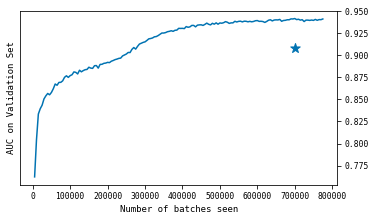

In [99]:
outname="fig_RNtraining_aucexample1nu"
def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf.iloc[6:7,:].sort_values(by='dexe')
    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='ustep'
        plot_training_onax(row,ax, C  = COLS[i], ytarg=ytarg)
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1
#     ax.set_xlim((-100000,1000000))  
        
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top,legend=False)

In [21]:
outname="fig_RNtraining_hg_smallbatch_all"
def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==5) & (modelsdf.dataset=="hg19")].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='epoch'
        if row['name']=='M1957_hgGOOD_bsm_5_dexe_100_long':
            co='black'
        else:
            co=COLS[i]
            i+=1
        plot_training_onax(row,ax, C  = co)
        plot_test_results_onax(row,ax, C= co)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-100000,2000000))    
    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

/home/ska/tools/py3_venv/lib/python3.6/site-packages/pandas/core/ops.py:792: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


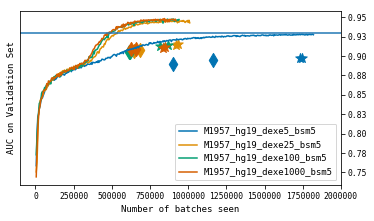

In [22]:
outname="fig_RNtraining_hg_smallbatch"

def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==5) & (modelsdf.dataset=="hg19") &(modelsdf['name']!='M1957_hgGOOD_bsm_5_dexe_100_long')].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='epoch'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-100000,2000000))    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

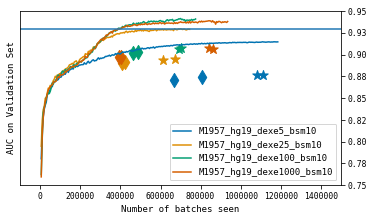

In [23]:
outname="fig_RNtraining_hg_medbatch"

def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==10) & (modelsdf.dataset=="hg19") &(modelsdf['name']!='M1957_hgGOOD_bsm_5_dexe_100_long')].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='epoch'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-100000,1500000))    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

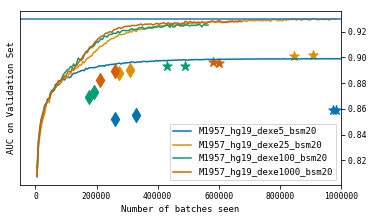

In [24]:
outname="fig_RNtraining_hg_largebatch"

def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==20) & (modelsdf.dataset=="hg19") &(modelsdf['name']!='M1957_hgGOOD_bsm_5_dexe_100_long')].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='epoch'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-50000,1000000))    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

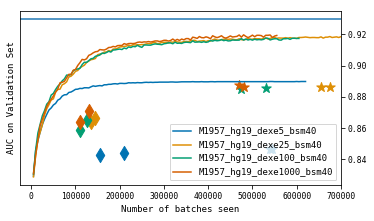

In [25]:
outname="fig_RNtraining_hg_vlargebatch"

def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==40) & (modelsdf.dataset=="hg19") &(modelsdf['name']!='M1957_hgGOOD_bsm_5_dexe_100_long')].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='epoch'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-25000,700000))    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

# Mouse trained models

In [26]:
def plot_mm_test_results_onax(row,ax,C):
    namemask = nicetablemm['name'] == row['name']
    aucmask = nicetablemm['Tcase'] == 'auc'
    lossmask = nicetablemm['Tcase'] == 'loss'

    xs = nicetablemm[namemask & aucmask].Tustep.astype(int).values
    ys = nicetablemm[namemask & aucmask].Tauc.astype(float).values
    ax.scatter(y=ys,x=xs, marker="*", color=C,s=100)
    
    xs = nicetablemm[namemask & lossmask].Tustep.astype(int).values
    ys = nicetablemm[namemask & lossmask].Tauc.astype(float).values
    ax.scatter(y=ys,x=xs, marker="d", color=C,s=100)

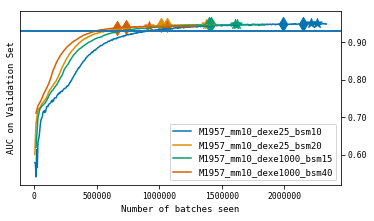

In [27]:
outname="fig_RNtraining_mm_onmm"

def dothis(ax):
    tp = modelsdf[ (modelsdf.dataset=="mm10")].sort_values(by='dexe')

    COLS = sns.color_palette('colorblind',8)
    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='ustep'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_mm_test_results_onax(row,ax, C= COLS[i])
        i+=1

        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.axhline(0.93)
#         plt.xlim((-25000,700000))    
        
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

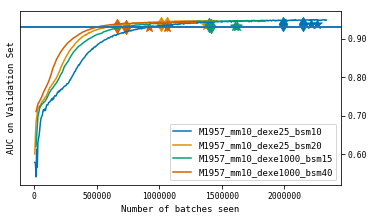

In [28]:
outname="fig_RNtraining_mm_onhg"

def dothis(ax):
    tp = modelsdf[ (modelsdf.dataset=="mm10")].sort_values(by='dexe')

    COLS = sns.color_palette('colorblind',8)
    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='ustep'
        plot_training_onax(row,ax, C  = COLS[i])
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1

        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.axhline(0.93)
#         plt.xlim((-25000,700000))    
        
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top)

In [29]:
def theplot(dowhattoax,outname, YLAB='Y U NO YLAB',XLAB='Y U NO XLAB',tickright=True,
            left=.03, bottom=.07, right=.97, top=.99,legend=True):
    Fwidth = THESIS_PAGEWIDTH
    Fheight = Fwidth*(9/16.)

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top)
    
    dowhattoax(ax)
    
    if legend:
        plt.legend(loc='upper right')
        
    
    ax.set_ylabel(YLAB)
    ax.set_xlabel(XLAB)
    if tickright:
        ax.yaxis.tick_right()
    # ax.yaxis.set_label_position("right")
    fig.set_size_inches (Fwidth, Fheight)

    fig.savefig('../Figures/from_notebooks/{}.pdf'.format(outname))

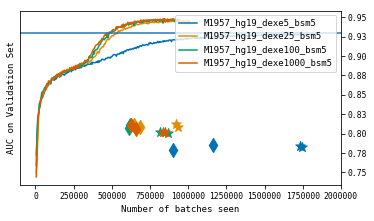

In [30]:
outname="fig_RNtraining_hg_onmm"

def dothis(ax):
    COLS = sns.color_palette('colorblind',8)
    tp = modelsdf[(modelsdf.bsm==5) & (modelsdf.dataset=="hg19")].sort_values(by='dexe')

    i=0
    for rowi, row in tp.iterrows():
        if 'long' in row['name']:
            continue
        ytarg='auc'
        xtarg='epoch'
#         if row['name']=='M1957_hgGOOD_bsm_5_dexe_100_long':
#             co='black'
#         else:
        co=COLS[i]
        i+=1
        plot_training_onax(row,ax, C  = co)
        plot_mm_test_results_onax(row,ax, C= co)
    
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.axhline(0.93)
    plt.xlim((-100000,2000000)) 
#     plt.ylim((0.,1)) 
    
    
theplot(dothis,outname,YLAB,XLAB,
       left=left,bottom=bottom,right=right,top=top, legend=True)

In [31]:
def theplot(dowhattoax,outname, YLAB='Y U NO YLAB',XLAB='Y U NO XLAB',tickright=True,
            left=.03, bottom=.07, right=.97, top=.99,legend=True):
    Fwidth = THESIS_PAGEWIDTH*3
    Fheight = Fwidth*(9/16.)

    fig, ax = plt.subplots()
    fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top)
    
    dowhattoax(ax)
    
    if legend:
        plt.legend()
        
    
    ax.set_ylabel(YLAB)
    ax.set_xlabel(XLAB)
    if tickright:
        ax.yaxis.tick_right()
    # ax.yaxis.set_label_position("right")
    fig.set_size_inches (Fwidth, Fheight)

    fig.savefig('../Figures/from_notebooks/{}.pdf'.format(outname))

In [32]:
tpl = [[50000,0.6399],[100000,0.6701],[150000,0.6866],[200000,0.6981],[250000,0.7084],[300000,0.7137],[350000,0.7194],[400000,0.7223],[450000,0.7229],[500000,0.7255],[550000,0.7280],[600000,0.7280],[650000,0.7312],[700000,0.7324],[750000,0.7326],[800000,0.7348],[850000,0.7346],[900000,0.7374],[950000,0.7384],[1000000,0.7383],[1050000,0.7400],[1100000,0.7408],[1150000,0.7422],[1200000,0.7437],[1250000,0.7451],[1300000,0.7462],[1350000,0.7472],[1400000,0.7490],[1450000,0.7491],[1500000,0.7520],[1550000,0.7531],[1600000,0.7545],[1650000,0.7573],[1700000,0.7591],[1750000,0.7609],[1800000,0.7632],[1850000,0.7645],[1900000,0.7656],[1950000,0.7692],[2000000,0.7714],[2050000,0.7725],[2100000,0.7753],[2150000,0.7779],[2200000,0.7793],[2250000,0.7807],[2300000,0.7840],[2350000,0.7870],[2400000,0.7895],[2450000,0.7906],[2500000,0.7942],[2550000,0.7968],[2600000,0.7973],[2650000,0.8003],[2700000,0.8027],[2750000,0.8048],[2800000,0.8057],[2850000,0.8078],[2900000,0.8116],[2950000,0.8126],[3000000,0.8150],[3050000,0.8167],[3100000,0.8188],[3150000,0.8204],[3200000,0.8221],[3250000,0.8223],[3300000,0.8249],[3350000,0.8271],[3400000,0.8284],[3450000,0.8304],[3500000,0.8317],[3550000,0.8333],[3600000,0.8345],[3650000,0.8362],[3700000,0.8380],[3750000,0.8394],[3800000,0.8406],[3850000,0.8420],[3900000,0.8430],[3950000,0.8448],[4000000,0.8456],[4050000,0.8465],[4100000,0.8480],[4150000,0.8498],[4200000,0.8507],[4250000,0.8518],[4300000,0.8534],[4350000,0.8546],[4400000,0.8558],[4450000,0.8568],[4500000,0.8579],[4550000,0.8594],[4600000,0.8601],[4650000,0.8611],[4700000,0.8624],[4750000,0.8627],[4800000,0.8642],[4850000,0.8653],[4900000,0.8661],[4950000,0.8667],[5000000,0.8683],[5050000,0.8694],[5100000,0.8701],[5150000,0.8702],[5200000,0.8716],[5250000,0.8730],[5300000,0.8733],[5350000,0.8745],[5400000,0.8749],[5450000,0.8756],[5500000,0.8766],[5550000,0.8773],[5600000,0.8784],[5650000,0.8788],[5700000,0.8801],[5750000,0.8798]]

In [33]:
tpldf = pd.DataFrame(tpl)

In [34]:

def dothis(ax):
    
    tp = modelsdf[ (modelsdf.dataset=="mm10")].sort_values(by='dexe')
    COLS = sns.color_palette('colorblind',8)
    i=0
    for rowi, row in tp.iterrows():
        ytarg='auc'
        xtarg='ustep'
        
        plot_training_onax(row,ax, C  = COLS[i], xmultiplier=row.bsm)
        plot_test_results_onax(row,ax, C= COLS[i])
        i+=1

        ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
        plt.axhline(0.93)

        
legend=False
outname="fig_foo"

left=.03
bottom=.07
right=.97
top=.99
Fwidth = THESIS_PAGEWIDTH*3
Fheight = Fwidth*(9/16.)

fig, ax = plt.subplots()
fig.subplots_adjust(left=left, bottom=bottom, right=right, top=top)

dothis(ax)
ax.plot(tpldf[0].values*8, tpldf[1].values, color='black' )


if legend:
    plt.legend()


ax.set_ylabel(YLAB)
ax.set_xlabel(XLAB)

# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)

fig.savefig('../Figures/from_notebooks/{}.pdf'.format(outname))
#         plt.xlim((-25000,700000))    
        



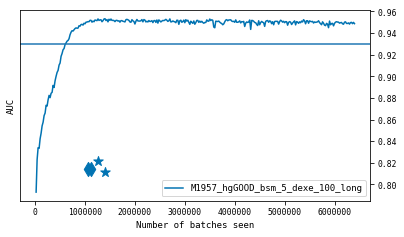

In [35]:
tp = modelsdf.iloc[0:1,:]



Fwidth = THESIS_PAGEWIDTH
Fheight = Fwidth*(9/16.)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.02, bottom=.07, right=.97, top=.99)


COLS = sns.color_palette('colorblind',8)

i=0
for rowi, row in tp.iterrows():
    ytarg='auc'
    xtarg='epoch'
    plot_training_onax(row,ax, C  = COLS[i], ytarg=ytarg)
    plot_mm_test_results_onax(row,ax, C= COLS[i])
    i+=1
    
# plt.axhline(0.93)
plt.axhline(0.93)

plt.legend()
ax.set_ylabel('AUC')
ax.set_xlabel('Number of batches seen')
ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)

# fig.savefig('../Figures/from_notebooks/fig_RNtraining_hg_onmm.pdf')

In [36]:
modelsdf[modelsdf['dataset']=='mm10']

pwm dataset  dexe  bsm                       name  \
20  M1957    mm10  1000   15  M1957_mm10_dexe1000_bsm15   
21  M1957    mm10  1000   40  M1957_mm10_dexe1000_bsm40   
22  M1957    mm10    25   10    M1957_mm10_dexe25_bsm10   
23  M1957    mm10    25   20    M1957_mm10_dexe25_bsm20   

                                                   fp  
20  NIMRODREPODIR/results2019/test_swe...  
21  NIMRODREPODIR/results2019/test_swe...  
22  NIMRODREPODIR/results2019/test_swe...  
23  NIMRODREPODIR/results2019/test_swe...

In [37]:
modelsdf.loc[[23],:]

pwm dataset  dexe  bsm                     name  \
23  M1957    mm10    25   20  M1957_mm10_dexe25_bsm20   

                                                   fp  
23  NIMRODREPODIR/results2019/test_swe...

In [38]:

Fwidth = THESIS_PAGEWIDTH *3
Fheight = Fwidth*(9/16.)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.02, bottom=.07, right=.97, top=.99)


COLS = sns.color_palette('colorblind',8)

i=0

for rowi, row in modelsdf[modelsdf['dataset']=='mm10'].iterrows():
    ytarg='loss'
    xtarg='epoch'
    plot_training_onax(row,ax, C  = COLS[i], ytarg=ytarg,xmultiplier=row.bsm)
#     plot_mm_test_results_onax(row,ax, C= COLS[i])
    i+=1
    
# y,x = np.array(samp).T    
# ax.scatter(y=y,x=x*5, marker="*", color='black',s=100)





plt.legend()
ax.set_ylabel('AUC')
ax.set_xlabel('Number of batches seen')
ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)

# fig.savefig('../Figures/from_notebooks/fig_RNtraining_hg_onmm.pdf')

In [39]:

Fwidth = THESIS_PAGEWIDTH *3
Fheight = Fwidth*(9/16.)

fig, ax = plt.subplots()
fig.subplots_adjust(left=.02, bottom=.07, right=.97, top=.99)


COLS = sns.color_palette('colorblind',8)

i=0

for rowi, row in modelsdf[modelsdf['dataset']=='mm10'].iterrows():
    ytarg='auc'
    xtarg='epoch'
    plot_training_onax(row,ax, C  = COLS[i], ytarg=ytarg,xmultiplier=row.bsm)
#     plot_mm_test_results_onax(row,ax, C= COLS[i])
    i+=1
    
# y,x = np.array(samp).T    
# ax.scatter(y=y,x=x*5, marker="*", color='black',s=100)

plt.legend()
ax.set_ylabel('AUC')
ax.set_xlabel('Number of batches seen')
ax.yaxis.tick_right()
# ax.yaxis.set_label_position("right")
fig.set_size_inches (Fwidth, Fheight)

# fig.savefig('../Figures/from_notebooks/fig_RNtraining_hg_onmm.pdf')